# Array Data

*Author: Creare* <br>
*Date: April 01 2020* <br>

**Keywords**: podpac, DataSource, Array

## Overview

Reference tutorial for loading Array data with the `podpac.data.Array` Node.

### Prerequisites

- Python 2.7 or above
- [`podpac`](https://podpac.org/install.html#install)
- *Review the [README.md](../README.md) and [jupyter-tutorial.ipynb](jupyter-tutorial.ipynb) for additional info on using jupyter notebooks*

### See Also

- [0-concepts/introduction.ipynb](introduction.ipynb): PODPAC introduction
- [0-concepts/coordinates.ipynb](../0-concepts/coordinates.ipynb): PODPAC Coordinates reference
- [`podpac.data.Array` API Reference](https://podpac.org/api/podpac.data.Array.html#podpac.data.Array)

## Array Data

In [1]:
# plot inline
%matplotlib inline

import podpac
import numpy as np

In [2]:
# create mock numpy array data
data = np.random.rand(5, 5)
data

array([[0.69214999, 0.85728564, 0.31357694, 0.96635063, 0.36801704],
       [0.81632043, 0.06622826, 0.32806399, 0.530213  , 0.06581387],
       [0.22993026, 0.65443344, 0.53940246, 0.33847399, 0.7079277 ],
       [0.1326519 , 0.16155557, 0.07944293, 0.14132234, 0.73113369],
       [0.04319356, 0.82958051, 0.86022727, 0.94137872, 0.43717177]])

In [3]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = podpac.Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [4]:
# create Array DataSource node
node = podpac.data.Array(source=data, native_coordinates=native_coords)
node

<Array(shape=(5, 5), interpolation='nearest')>

In [5]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.69215 , 0.857286, 0.313577, 0.966351, 0.368017],
       [0.81632 , 0.066228, 0.328064, 0.530213, 0.065814],
       [0.22993 , 0.654433, 0.539402, 0.338474, 0.707928],
       [0.132652, 0.161556, 0.079443, 0.141322, 0.731134],
       [0.043194, 0.829581, 0.860227, 0.941379, 0.437172]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x00000187AD60B9E8>
    crs:          EPSG:4326

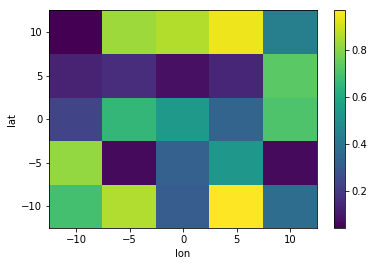

In [6]:
output.plot()
pass

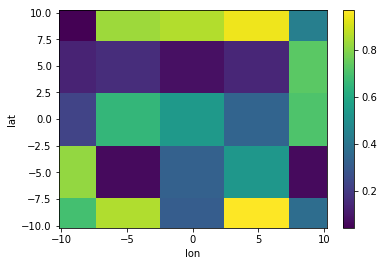

In [7]:
# scale down data (higher resolution)
# default interpolation is nearest neighbor
coords = podpac.Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

In [8]:
# create Array DataSource node with  bilinear interpolation to scale down (higher resolution) 
node = podpac.data.Array(source=data, native_coordinates=native_coords, interpolation="bilinear")
node

<Array(shape=(5, 5), interpolation='bilinear')>

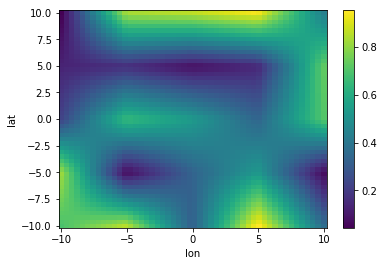

In [9]:
output = node.eval(coords)
output.plot()
pass